In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
np.random.seed(17)
tf.random.set_seed(17)

In [4]:
df_1 = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/train/', labels='inferred')

Found 5216 files belonging to 2 classes.


In [5]:
df_2 = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/val', labels = 'inferred')

Found 16 files belonging to 2 classes.


In [135]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(90, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
   
   tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 127, 127, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_31 (Bat  (None, 62, 62, 128)      512       
 chNormalization)                                                
                                                     

In [136]:
steps_per_epoch = 200
boundaries = [steps_per_epoch * n for n in [25,50,75]]
values = [1e-3,1e-4,1e-5,1e-6]
lr_sched = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)


In [137]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr_sched),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [138]:
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                          patience=8,
                                           verbose=1)

In [139]:
history = model.fit(df_1,
                    validation_data=(df_2),
                    batch_size=1000,
                    epochs=60,
                    callbacks=stopping
                   )

Epoch 1/60
163/163 [==============================] - 26s 153ms/step - loss: 0.2034 - accuracy: 0.9293 - val_loss: 2.3504 - val_accuracy: 0.6250
Epoch 2/60
163/163 [==============================] - 27s 162ms/step - loss: 0.0950 - accuracy: 0.9649 - val_loss: 3.3963 - val_accuracy: 0.5000
Epoch 3/60
163/163 [==============================] - 27s 163ms/step - loss: 0.0762 - accuracy: 0.9722 - val_loss: 0.4671 - val_accuracy: 0.7500
Epoch 4/60
163/163 [==============================] - 27s 162ms/step - loss: 0.0570 - accuracy: 0.9787 - val_loss: 0.1346 - val_accuracy: 1.0000
Epoch 5/60
163/163 [==============================] - 25s 153ms/step - loss: 0.0526 - accuracy: 0.9799 - val_loss: 0.9697 - val_accuracy: 0.7500
Epoch 6/60
163/163 [==============================] - 27s 161ms/step - loss: 0.0424 - accuracy: 0.9843 - val_loss: 3.6871 - val_accuracy: 0.5625
Epoch 7/60
163/163 [==============================] - 26s 158ms/step - loss: 0.0359 - accuracy: 0.9868 - val_loss: 0.9146 - val_ac

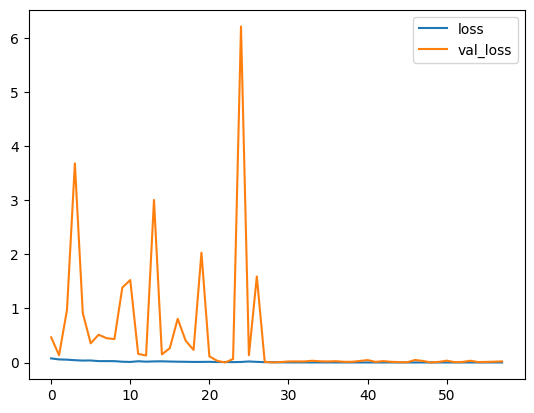

In [140]:
plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.legend(['loss', 'val_loss'])

In [141]:
print(f"Максимальная точность тренировочной выборки {round(max(history.history['accuracy']), 4)}.")
print(f"Максимальная точность валидационной выборки {round(max(history.history['val_accuracy']), 4)}.")

Максимальная точность тренировочной выборки 0.9998.
Максимальная точность валидационной выборки 1.0.


In [289]:
test = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/test')

Found 624 files belonging to 2 classes.


In [142]:
test_pred = model.evaluate(
    x=test,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
)

20/20 [==============================] - 1s 41ms/step - loss: 3.8599 - accuracy: 0.7516


In [143]:
print(f"Точность тестовой выборки {round(test_pred[1], 3)}.")


Точность тестовой выборки 0.752.


In [ ]:
# получил низкую точность на тестовой выборке. Нужна доработка текущей модели, либо использование уже готовой предобученой модели.

In [6]:
from tensorflow.keras.layers import Input

input_tensor = Input(shape=(256, 256, 3))

In [8]:
# для начала попробовал версию B0, в итоге остановился на B2 т.к. она давала неплохую точность при небольшом использовании ресуросов ПК.
# думаю попробовать более сложные версии этой же архитектуры.

base_model = tf.keras.applications.EfficientNetB2(
    weights='imagenet',
    input_shape=(256, 256, 3),
    include_top=False
)

base_model.trainable = False

inputs = tf.keras.Input(shape=(256, 256, 3))
                     
x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(1)(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 8, 8, 1408)       7768569   
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1409      
                                                                 
Total params: 7,769,978
Trainable params: 1,409
Non-trainable params: 7,768,569
_________________________________________________________________


In [66]:
# пробовал разные оптимизаторы, но Адам показал себя лучше всех. Причем, уменьшение лернинг рейта приводило к ухудшению точности на порядок.

model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
                metrics=[tf.keras.metrics.BinaryAccuracy()]
               )

In [67]:
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy',
                                          patience=6,
                                           verbose=1
                                           )

In [68]:
# создадим генератор изображений для аугментации датасета.Это особенно важно для валидационной выборки, т.к. она крайне мала в начальном датасете.

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            zoom_range=0.5,
            horizontal_flip=True,
            rotation_range=45,
            width_shift_range=0.4,
            height_shift_range=0.4,
)

train_generator = datagen.flow_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/train/',batch_size=10,
        class_mode='binary')

valid_generator = datagen.flow_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/val/',batch_size=10,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [75]:
history_2 = model_2.fit(train_generator,
                    validation_data=valid_generator,
                    batch_size=20,
                    epochs=25,
                    callbacks=stopping
                   )

Epoch 1/25
522/522 [==============================] - 77s 147ms/step - loss: 0.1319 - binary_accuracy: 0.9467 - val_loss: 0.7171 - val_binary_accuracy: 0.8125
Epoch 2/25
522/522 [==============================] - 78s 150ms/step - loss: 0.1330 - binary_accuracy: 0.9440 - val_loss: 0.5198 - val_binary_accuracy: 0.8750
Epoch 3/25
522/522 [==============================] - 76s 145ms/step - loss: 0.1279 - binary_accuracy: 0.9503 - val_loss: 0.3632 - val_binary_accuracy: 0.8750
Epoch 4/25
522/522 [==============================] - 75s 144ms/step - loss: 0.1336 - binary_accuracy: 0.9427 - val_loss: 0.4477 - val_binary_accuracy: 0.8125
Epoch 5/25
522/522 [==============================] - 76s 145ms/step - loss: 0.1261 - binary_accuracy: 0.9484 - val_loss: 0.4854 - val_binary_accuracy: 0.8750
Epoch 6/25
522/522 [==============================] - 90s 173ms/step - loss: 0.1286 - binary_accuracy: 0.9498 - val_loss: 0.5235 - val_binary_accuracy: 0.7500
Epoch 7/25
522/522 [==========================

In [83]:
print(f"Максимальная точность тренировочной выборки {round(max(history_2.history['binary_accuracy'])*100, 2)}%.")
print(f"Максимальная точность валидационной выборки {round(max(history_2.history['val_binary_accuracy'])*100, 2)}%.")

Максимальная точность тренировочной выборки 95.42%.
Максимальная точность валидационной выборки 93.75%.


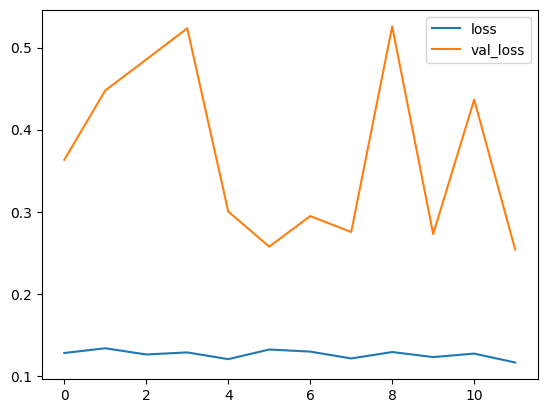

In [77]:
plt.plot(history_2.history['loss'][2:])
plt.plot(history_2.history['val_loss'][2:])
plt.legend(['loss', 'val_loss'])

In [78]:
test = tf.keras.utils.image_dataset_from_directory('G:/Lessons/DS/Try/My_own/Pnevmonia/Archive/chest_xray/test')

Found 624 files belonging to 2 classes.


In [79]:
test_pred = model_2.evaluate(
    x=test,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
)

20/20 [==============================] - 2s 62ms/step - loss: 0.2164 - binary_accuracy: 0.9119


In [81]:
print(f"Точность тестовой выборки {round(test_pred[1]*100, 2)}%")

Точность тестовой выборки 91.19%


In [ ]:
# Точность стала выше 90%, что уже неплохо. Можно попробовать усложнить аугментацию и выбрать более сложную модель нейронки.